In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
data["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

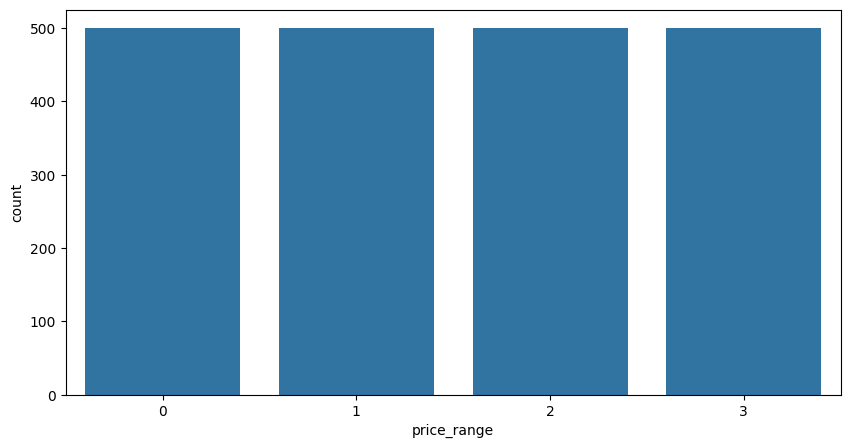

In [8]:
# Line 7 and 8 shows a Class Balance

plt.figure(figsize = (10,5))
sns.countplot(x = "price_range", data = data)

<Axes: >

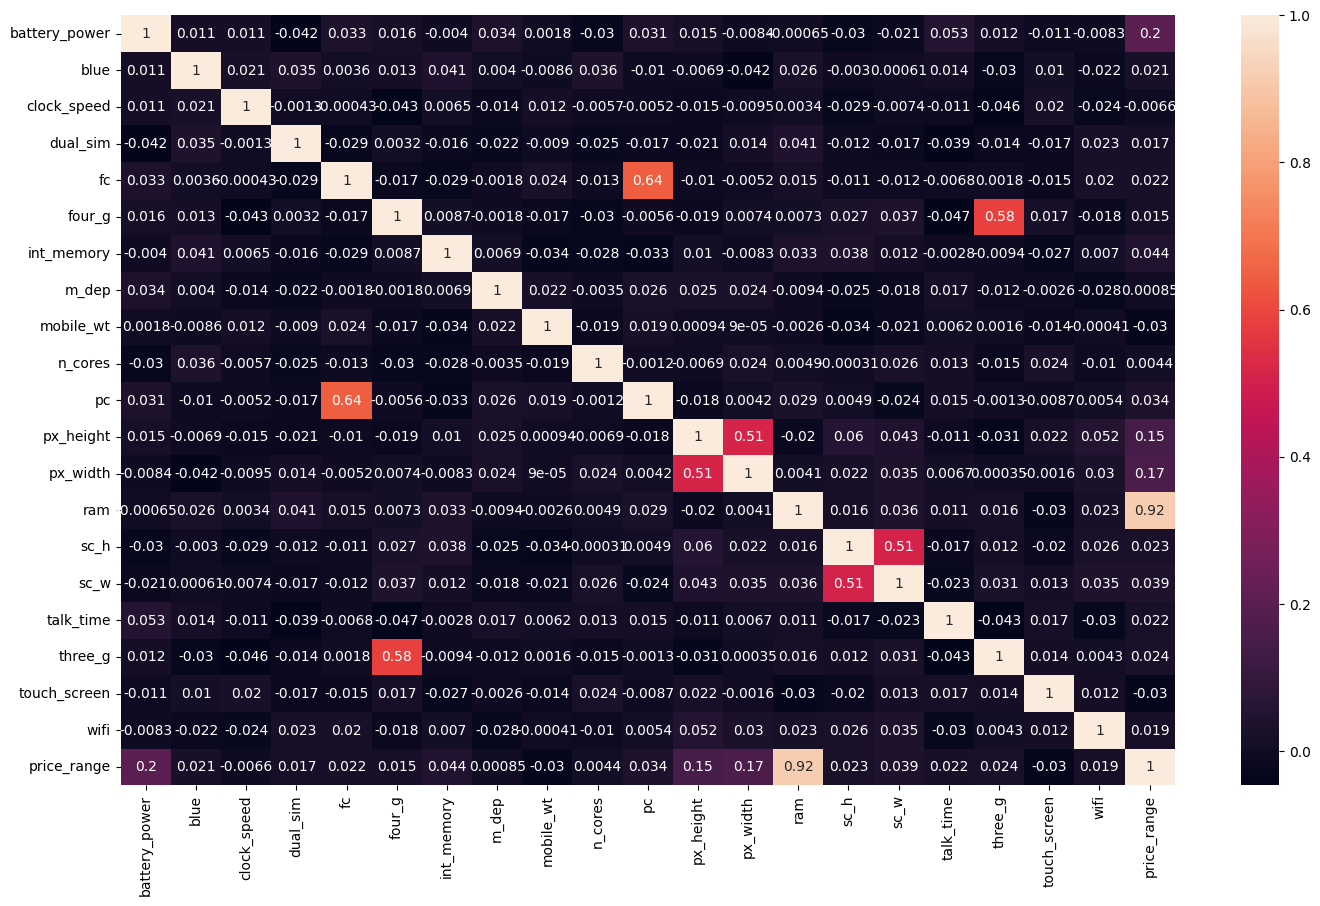

In [9]:
plt.figure(figsize = (17,10))
sns.heatmap(data.corr(), annot = True)

In [10]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Splitting ::: 1

In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

## FEATURE SELECTION

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(score_func = f_classif, k = 10)
z = select.fit_transform(x, y)
flt=select.get_support()
s=x.columns
print(s[flt])

Index(['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')


In [13]:
x = data[['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [14]:
x

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,7,188,2,20,756,2549,9,7,19
1,1021,53,136,3,905,1988,2631,17,3,7
2,563,41,145,5,1263,1716,2603,11,2,9
3,615,10,131,6,1216,1786,2769,16,8,11
4,1821,44,141,2,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...
1995,794,2,106,6,1222,1890,668,13,4,19
1996,1965,39,187,4,915,1965,2032,11,10,16
1997,1911,36,108,8,868,1632,3057,9,1,5
1998,1512,46,145,5,336,670,869,18,10,19


## FEATURE SCALING

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

## Data Splitting ::: 2

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25)

## MODEL DEVELOPMENT :::: Logistic Regression Model

In [17]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       131
           1       0.93      0.94      0.94       132
           2       0.90      0.93      0.92       119
           3       0.99      0.95      0.97       118

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



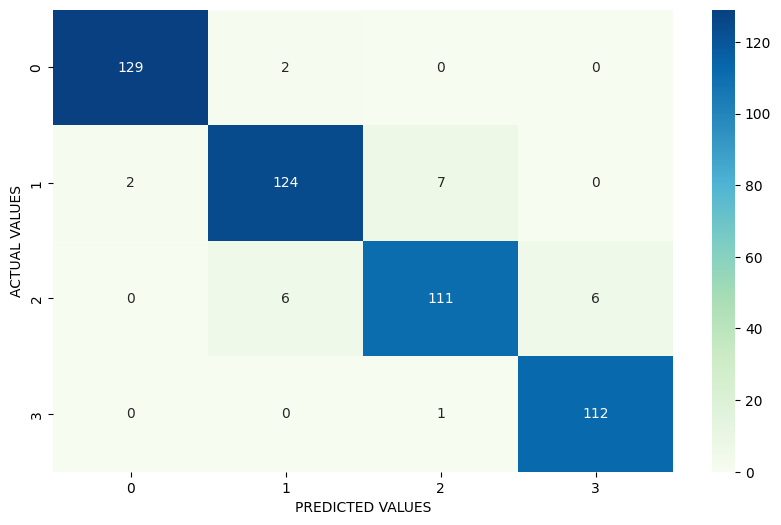

In [18]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

## HYPER PARAMETER FINE-TUNING

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {"C":[0.1, 0.5], "penalty":["l1", "l2"]}

In [26]:
gsearch = GridSearchCV(lr_model, parameters, cv = 7)

In [27]:
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
bestmodel = gsearch.best_estimator_
pred = bestmodel.predict(x_test)
print (classification_report(y_test, pred))

{'C': 0.5, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       131
           1       0.93      0.94      0.94       133
           2       0.93      0.90      0.92       123
           3       0.95      0.99      0.97       113

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



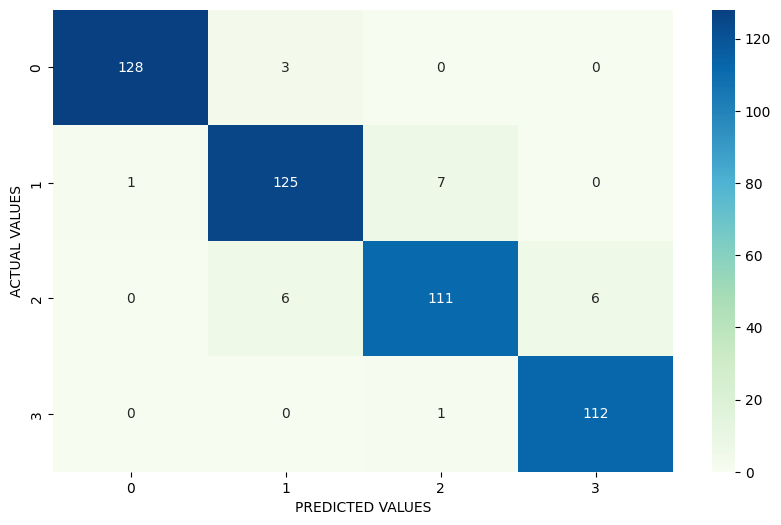

In [28]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()